In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
from util import show_images
%matplotlib inline

### Simplified Transform Function for Param tuning

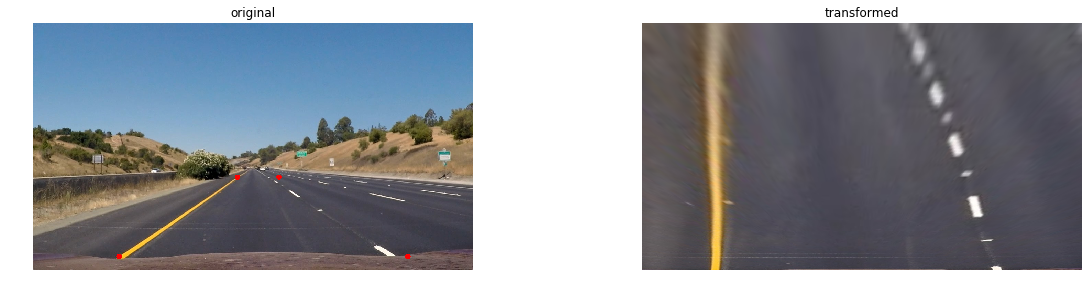

In [11]:
RED = (255,0,0)

bottom_left = (250, 680)
bottom_right = (1090, 680)
top_left = (595, 450)
top_right = (715, 450)

def perspective_transform(img):
    height, width = img.shape[:2]
    
    src = np.float32([bottom_left, top_left, top_right, bottom_right])
    dst = np.float32([[200,height], [200, 200], [width-200, 200], [width-200, height]])
    
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, (width, height))
    return warped, M

def with_points(img):
    with_points = img.copy()

    cv2.circle(with_points, bottom_left, 8, RED, -1)
    cv2.circle(with_points, top_left, 8, RED, -1)
    cv2.circle(with_points, top_right, 8, RED, -1)
    cv2.circle(with_points, bottom_right, 8, RED, -1)
    
    return with_points

def test_transform(img):

    transformed, M = perspective_transform(img)

    show_images({
        'original': with_points(img),
        'transformed': transformed
    })

img = mpimg.imread('./test_images/straight_lines1.jpg')
test_transform(img)

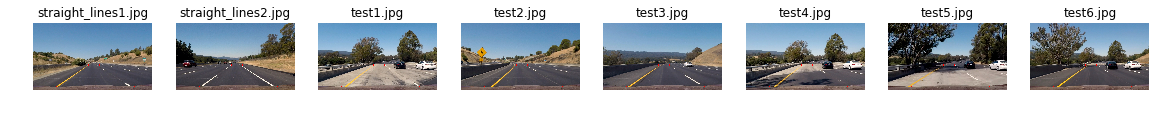

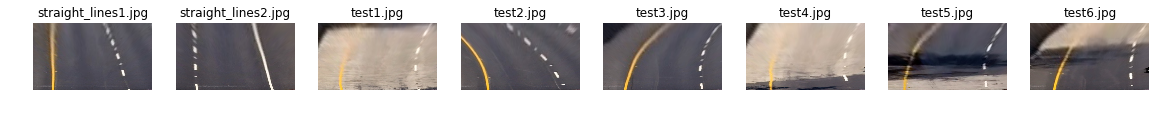

In [13]:
images = OrderedDict([(path, mpimg.imread(os.path.join(TEST_DIR, path))) for path in os.listdir(TEST_DIR)])
with_circles = OrderedDict([(path, with_points(img)) for (path, img) in images.items()])
show_images(with_circles)
transformed = OrderedDict([(path, perspective_transform(img)[0]) for (path, img) in images.items()])
show_images(transformed)

## See transform on all of our test images

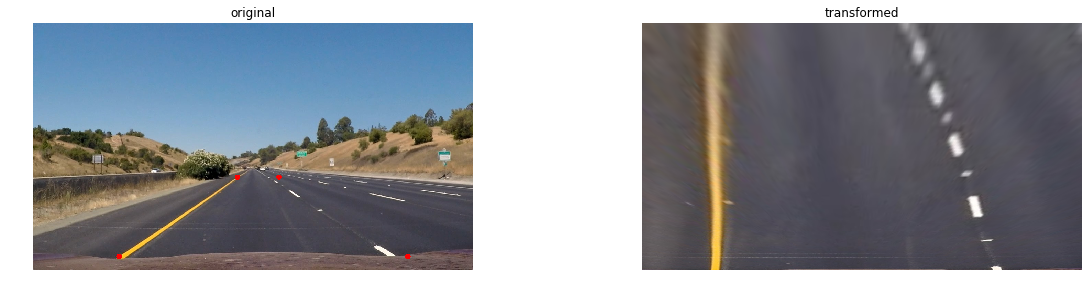

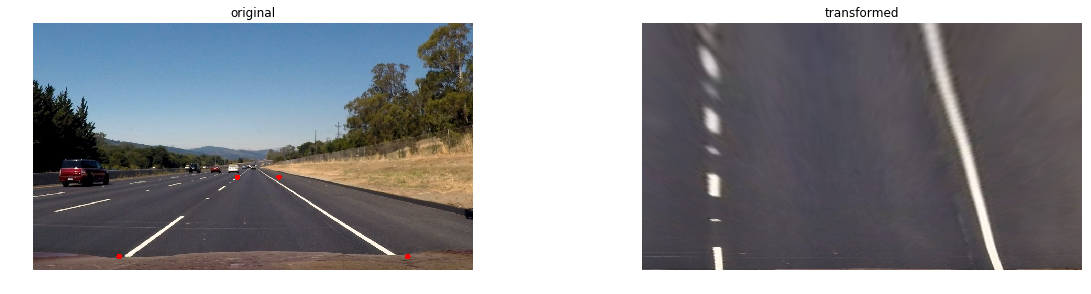

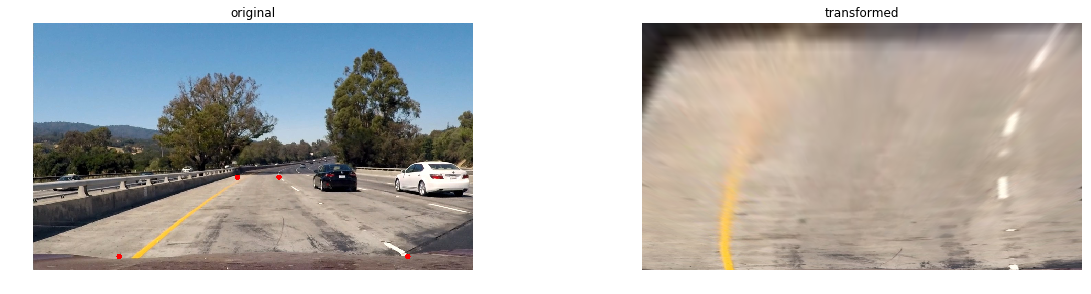

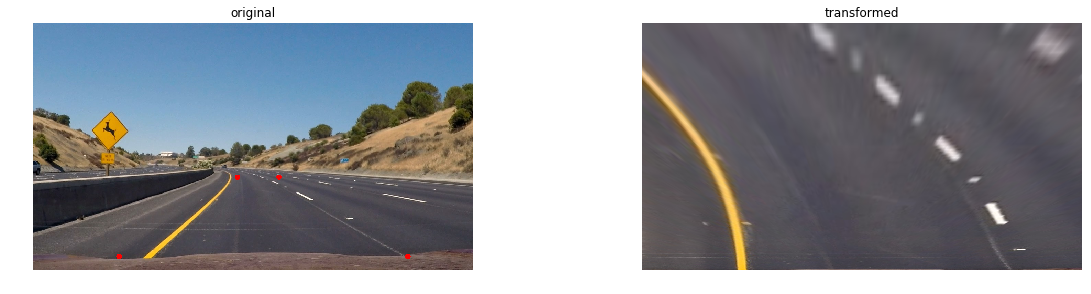

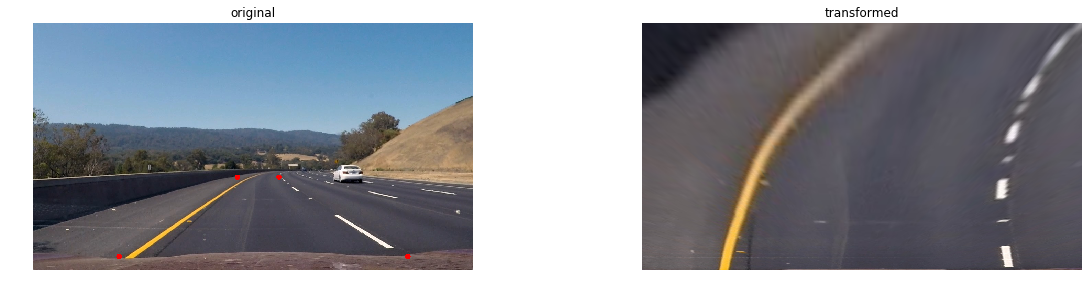

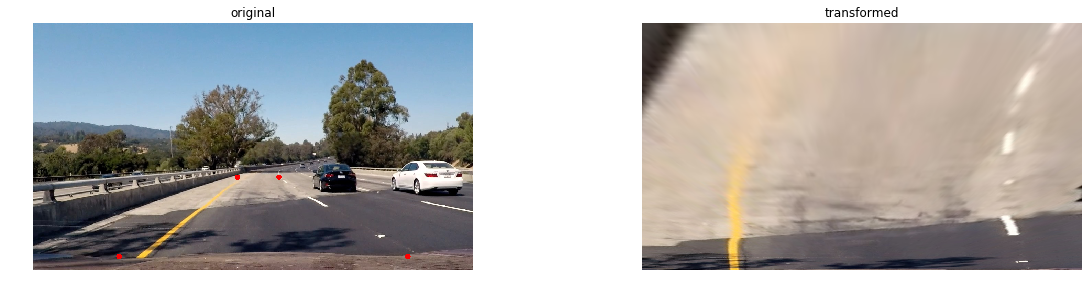

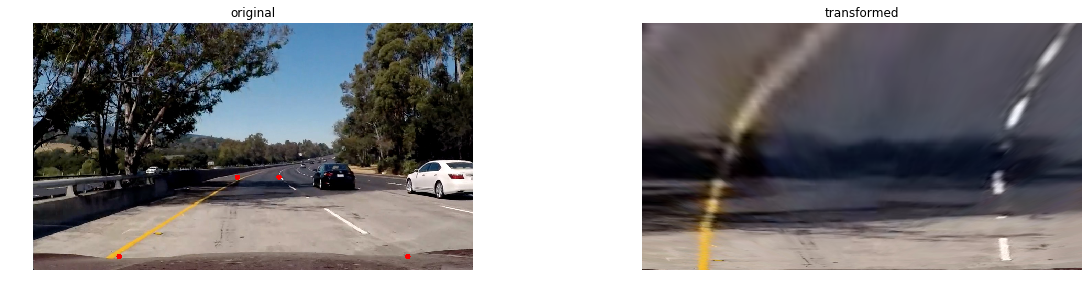

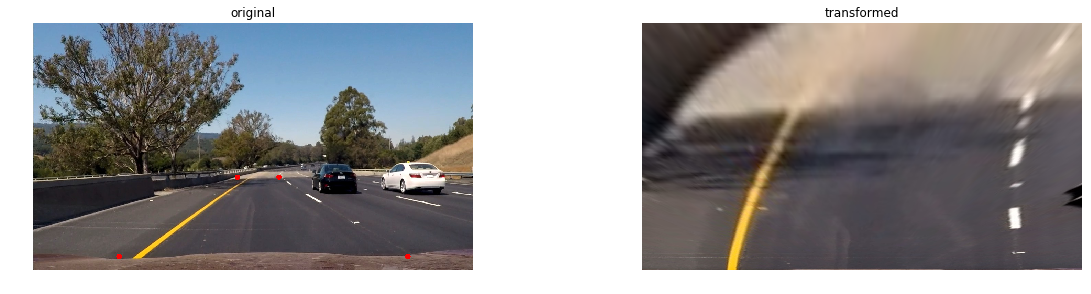

In [9]:
import os
from collections import OrderedDict
TEST_DIR = './test_images'
imgs = [mpimg.imread(os.path.join(TEST_DIR, path))  for path in os.listdir(TEST_DIR)]
for img in imgs:
    test_transform(img)